###### Dataset from [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction "EComm Churn")

# 1. Exploratory Data Analysis

## Import Libraries and Dataset

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif,chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, jaccard_score, log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from fancyimpute import IterativeImputer
from skopt import BayesSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from the excel file
description = pd.read_excel('dataset/E-Commerce.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
df = pd.read_excel('dataset/E-Commerce.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

From info above, 
- The data consists of 5630 rows and 20 columns (15 numeric columns and 5 categorical columns).
- It show that several columns have null/missing values ​​(non-null count < total rows).
- The name and data types of each columns seems matching.

In [4]:
# Remove CustomerID column 
df.drop(columns='CustomerID', inplace=True)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [6]:
# Show unique values 
print(df['PreferredLoginDevice'].unique())
print(df['PreferredPaymentMode'].unique())
print(df['Gender'].unique())
print(df['PreferedOrderCat'].unique())
print(df['MaritalStatus'].unique())

['Mobile Phone' 'Phone' 'Computer']
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
['Female' 'Male']
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
['Single' 'Divorced' 'Married']


It is known that:
- The value of the `PreferredLoginDevice` and `PreferredOrderCat` column contain a similar meaning value, **Phone** = **Mobile Phone**
- The value of the `PreferredPaymentMode` column contain a similar meaning value, **CC** = **Credit Card**, and **COD** = **Cash on Delivery**
- For other columns, there is no mistake.

In [7]:
# Check duplicate rows
duplicate_rows = df.duplicated().sum()
print('Of the entire rows, have been found {} rows duplicated data'. format(duplicate_rows))

Of the entire rows, have been found 556 rows duplicated data


## Desciptive Statistics

In [8]:
# Statistics summary of the data including the categorical columns
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [9]:
# Statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


From the statistics of numerical columns, it can be concluded that:
- It show that several columns have null/missing values ​​(count < total rows), which is `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, and `DaySinceLastOrder`.
- There is an outlier on `Tenure`, `WarehouseToHome` column, because it has a max value that is very far from the Q3 value.
- There is an outlier on `CashbackAmount` column, because it has a mean value that is higher than median values.
- For other columns, perhaps it approaches a normal distribution.

In [10]:
# Statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


From the statistics of categorical columns, it can be concluded that: 
- All categorical columns has no missing values.
- There are some values that have a proportion or frequency more than 50% of the number of rows on data, which is *Male* on `Gender` and *Mobile Phone* on `PreferredLoginDevice`.

In [11]:
# Proportion of count data on categorical columns
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

PreferredLoginDevice
Mobile Phone    49.111901
Computer        29.023091
Phone           21.865009
Name: proportion, dtype: float64
---------------------------
PreferredPaymentMode
Debit Card          41.101243
Credit Card         26.660746
E wallet            10.905861
UPI                  7.353464
COD                  6.483126
CC                   4.849023
Cash on Delivery     2.646536
Name: proportion, dtype: float64
---------------------------
Gender
Male      60.106572
Female    39.893428
Name: proportion, dtype: float64
---------------------------
PreferedOrderCat
Laptop & Accessory    36.412078
Mobile Phone          22.575488
Fashion               14.671403
Mobile                14.369449
Grocery                7.282416
Others                 4.689165
Name: proportion, dtype: float64
---------------------------
MaritalStatus
Married     53.037300
Single      31.900533
Divorced    15.062167
Name: proportion, dtype: float64
---------------------------


### Define Numerical Columns and Categorical Columns

In [12]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

We have 5 categorical columns : ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


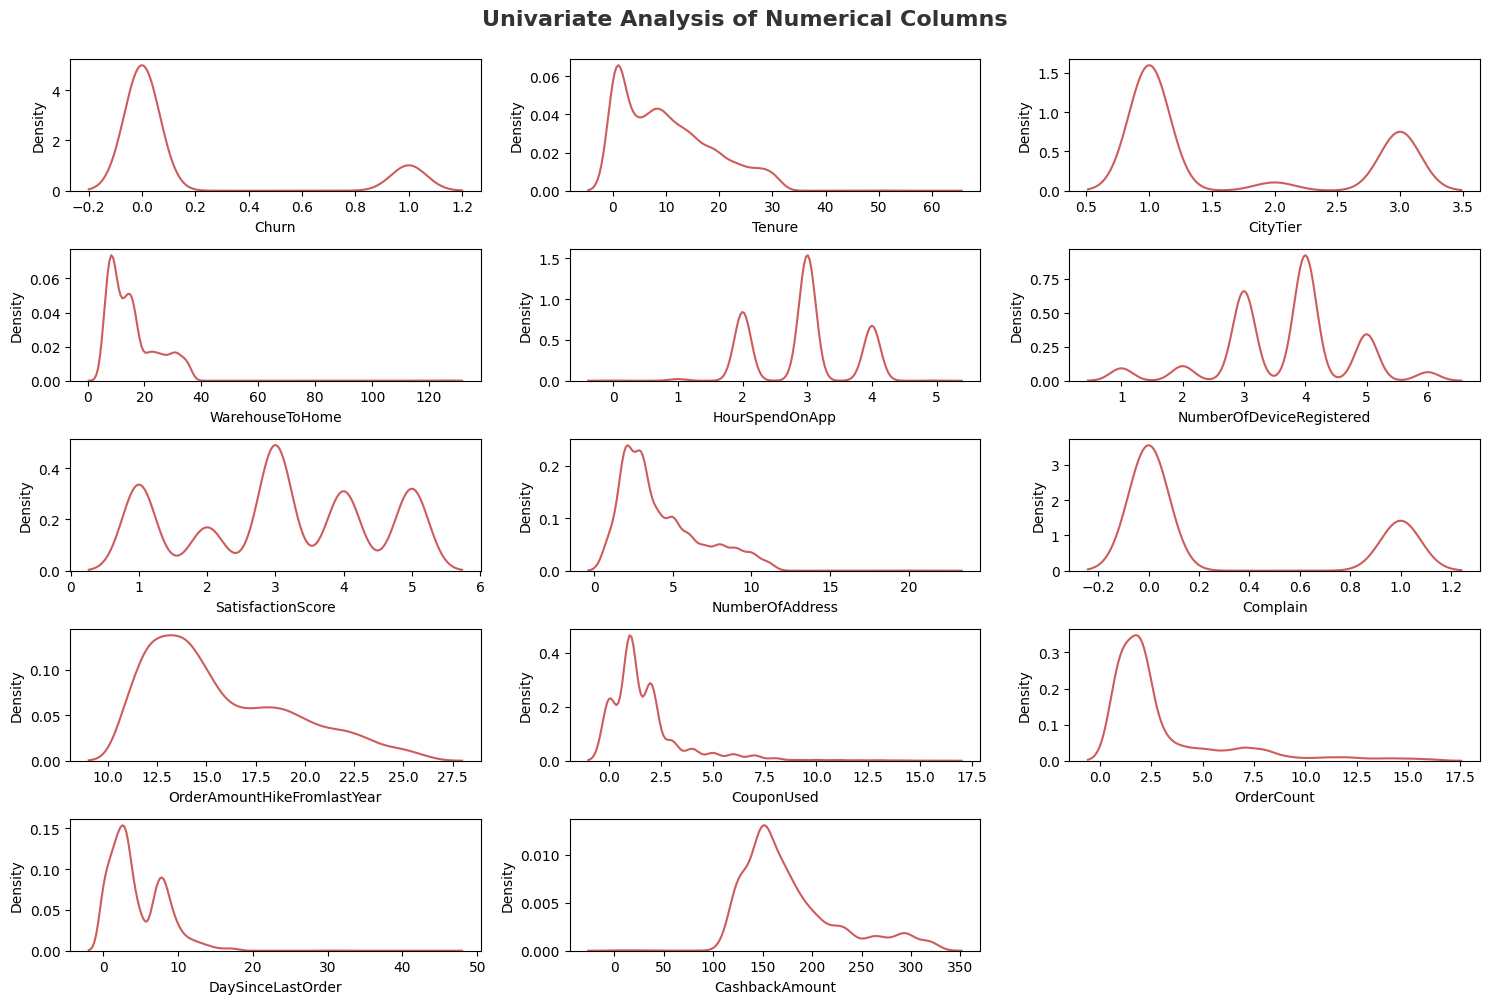

In [13]:
# Numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
    
# # Save plot
# plt.savefig('img/num_univariative.png')


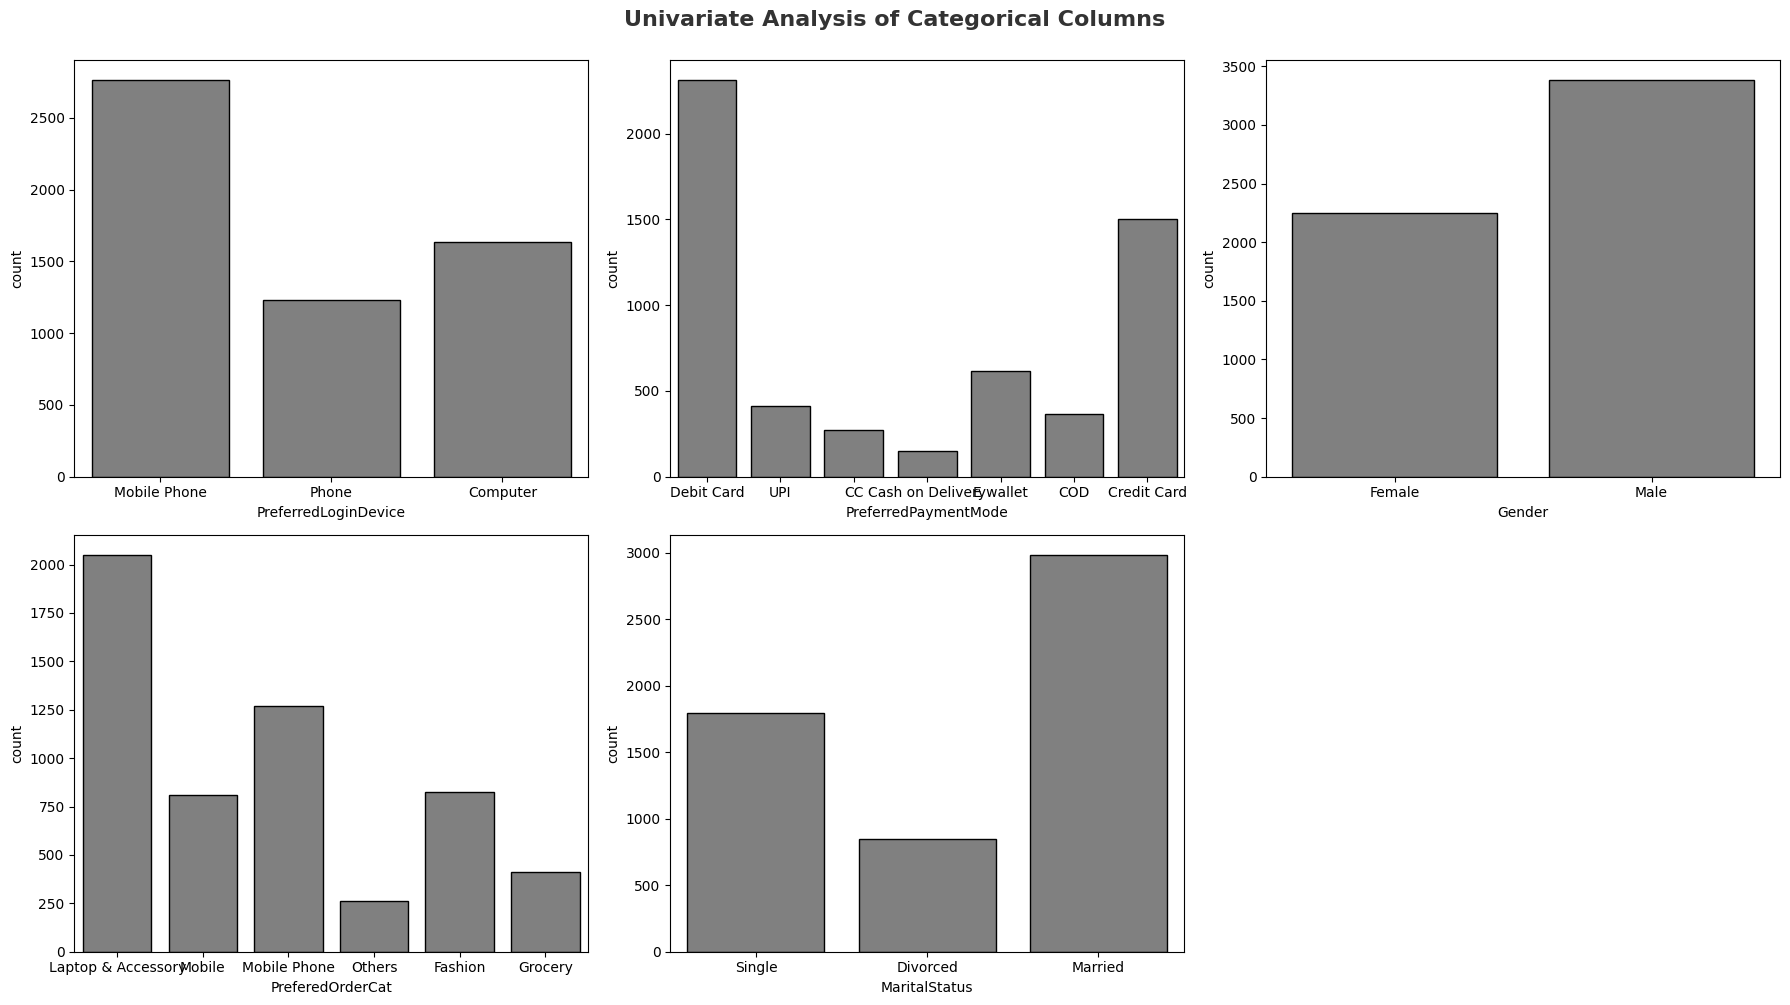

In [14]:
# Categorical columns
plt.figure(figsize=(18, 10))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='grey', edgecolor='black')
    plt.tight_layout()
    
# Save plot
plt.savefig('img/cat_univariate.png')

From the visualization results above, it can be concluded that:
- `PreferredLoginDevice` column is dominated (data proportion more than 50%) by *Mobile Phone*.
- `PreferredPaymentMode` column is dominated by *Debit Card* and *Credit Card*.
- `Gender` is dominated by *Male*.
- `PreferedOrderCat` column is dominated by *Laptop & Accessories*.
- `MaritalStatus` column is dominated by *Married*.

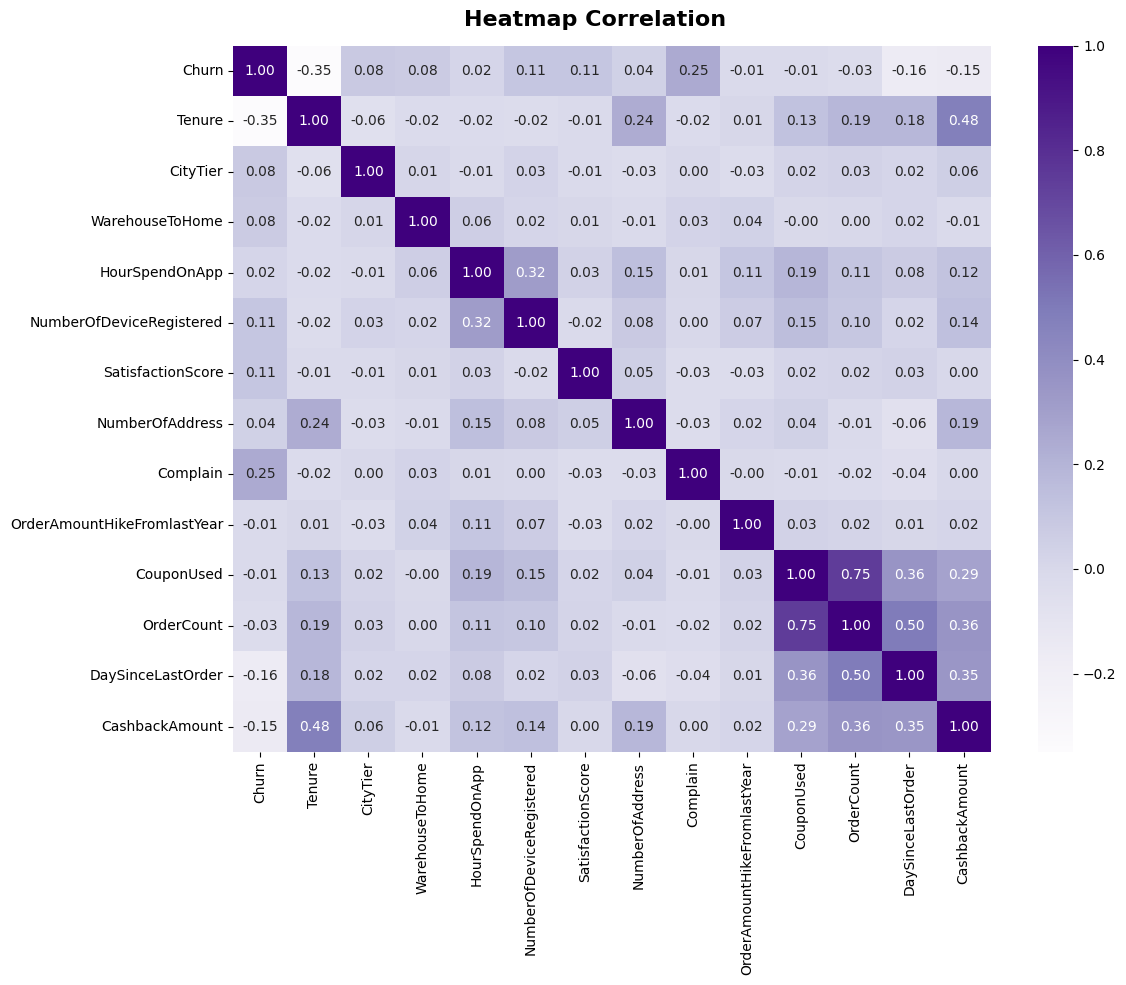

In [15]:
# Heatmap Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Purples')
plt.suptitle('Heatmap Correlation', color='black', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Save plot
plt.savefig('img/heatmap.png')

From the heatmap correlation, it is known that:
- The target column `Churn`, has a **weak negative** correlation to `Tenure` and **weak positive** correlation to `Complain`.
- `Tenure` has a **weak positive** correlation to `NumberOfAddress` and `CashbackAmount`.
- `CouponUsed` has a **strong positive** correlation to `OrderCount` and  has a **weak positive** correlation to `DaySinceLastOrder` and `CashbackAmount`.
- `OrderCount` has a **weak positive** correlation to `DaySinceLastOrder` and `CashbackAmount`.
- `DaySinceLastOrder` has a **weak positive** correlation to `CashbackAmount`.

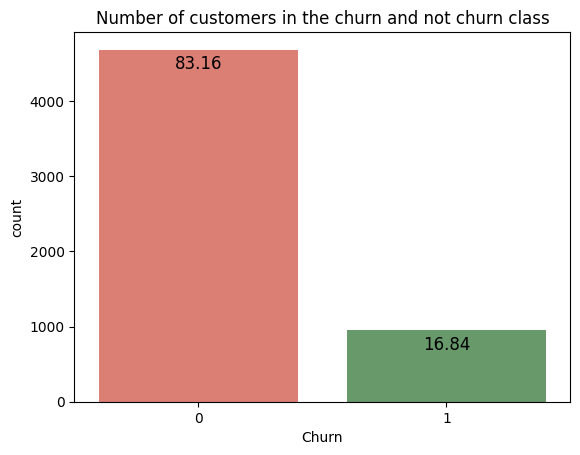

<Figure size 640x480 with 0 Axes>

In [16]:
#Count the number of customers in the churn and not churn class
clr = ['#EC7063', '#5FA164']

ax = sns.countplot(x='Churn', data=df, palette=clr)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.set_title('Number of customers in the churn and not churn class', fontsize=12)
plt.show()

# Save plot
plt.savefig('img/churnrate.png')

From visualization of the target column `Churn`, it is known that 83.16% customers are not churn.

In [17]:
# Check proportion target
prop_target = df['Churn'].value_counts(normalize=True) * 100
print('Percentage of customer not churn {}%'.format(round(prop_target[0], 1)))
print('Percentage of customer churn {}%'.format(round(prop_target[1], 1)))

Percentage of customer not churn 83.2%
Percentage of customer churn 16.8%


There are more retained than churned customers, the ratio of retained to churned is approximately 5 to 1, so the churn rate is very low, which is normal therefore making the data imbalanced.

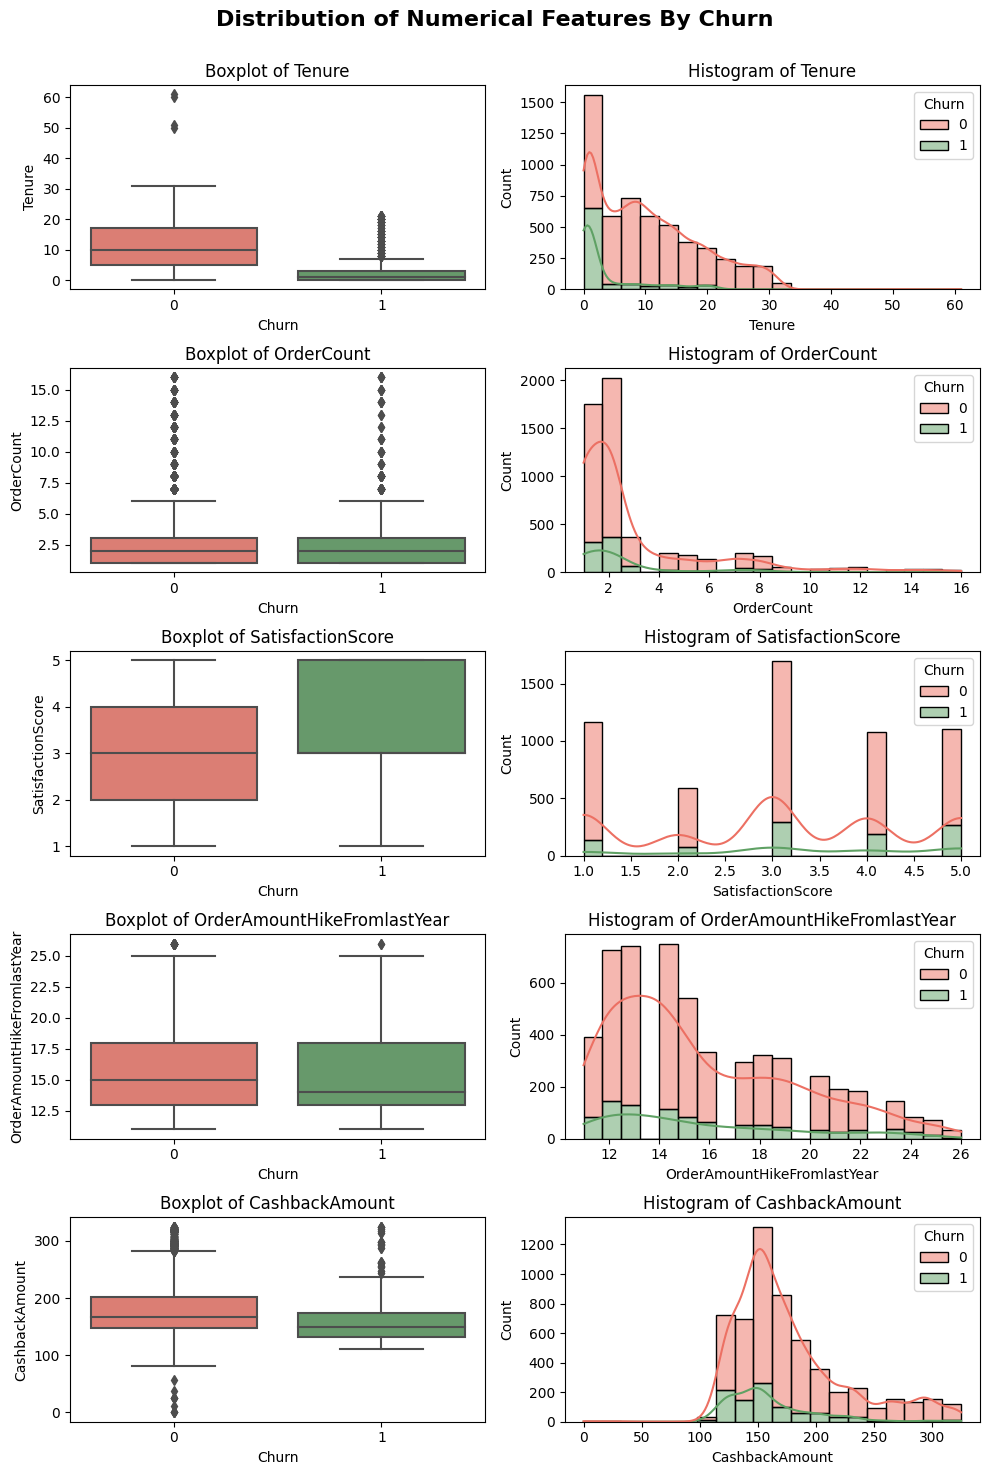

In [18]:
# EDA Numerical Features by Target (Churn)
num_cols2 = ['Tenure', 'OrderCount', 'SatisfactionScore', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
clr = ['#EC7063', '#5FA164']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Churn', color='black',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='Churn', y=col,  palette=clr, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True, 
                 multiple='stack', palette=clr, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

# Save plot
plt.savefig('img/num_multivariate.png')

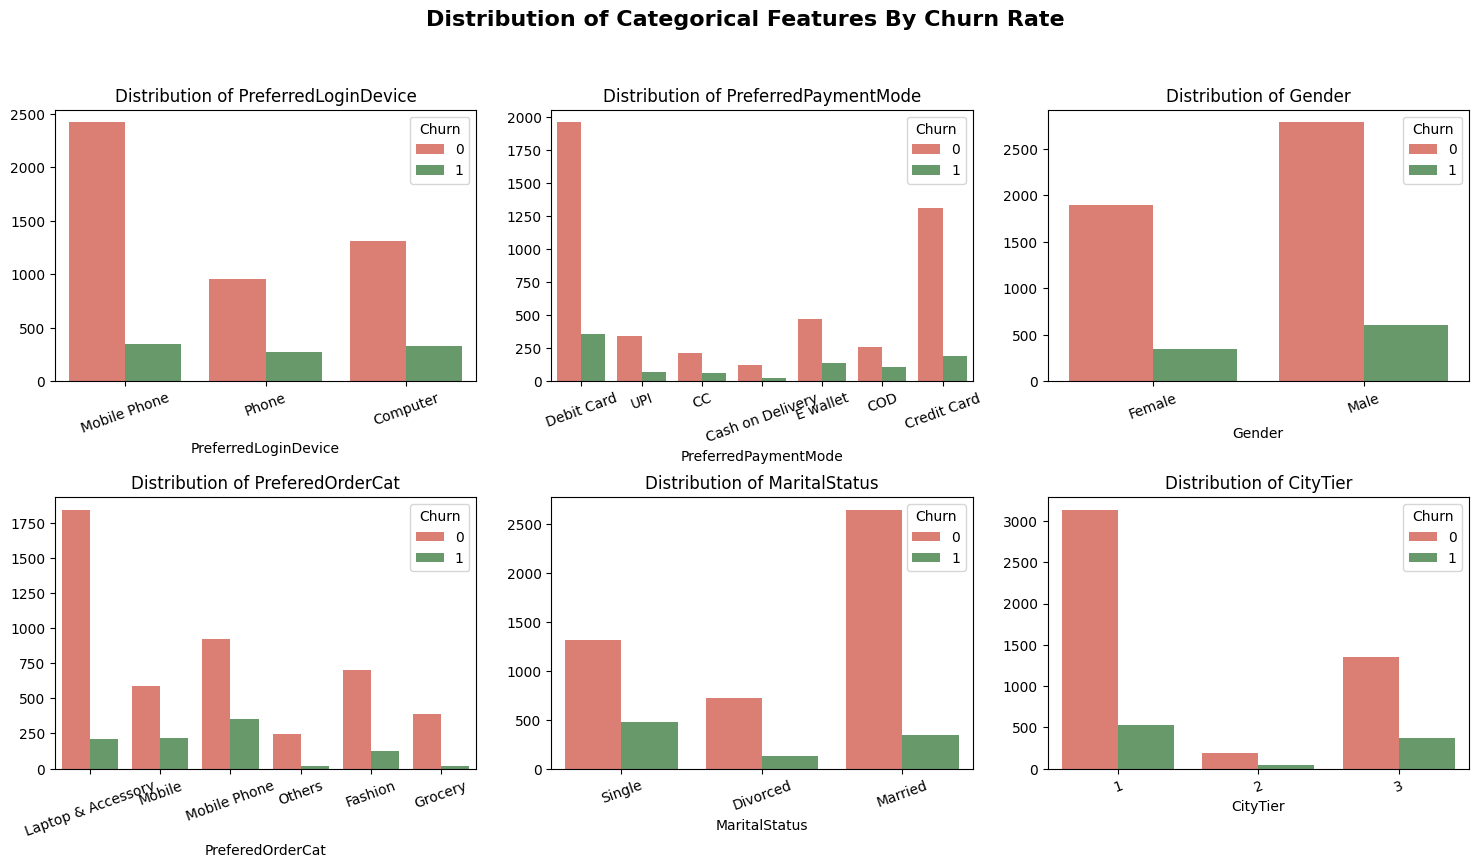

In [19]:
# EDA Categorical Features by Target (Churn)
cat_cols2 = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'CityTier']
clr = ['#EC7063', '#5FA164']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Churn Rate', color='black',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='Churn', palette=clr, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

# Save plot
plt.savefig('img/cat_multivariate_analysis.png')

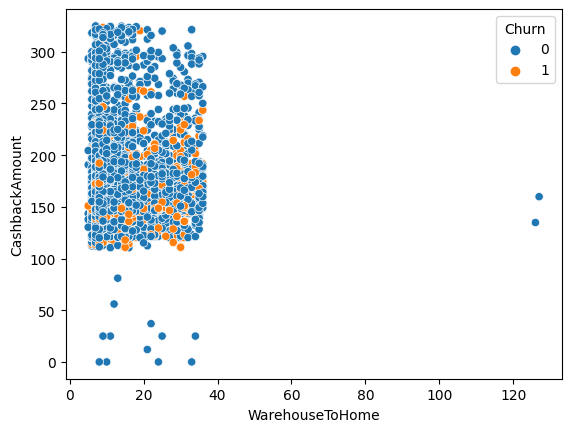

In [20]:
sns.scatterplot(x='WarehouseToHome', y='CashbackAmount', hue='Churn', data=df)

# Save plot
plt.savefig('img/plotWTH.png')

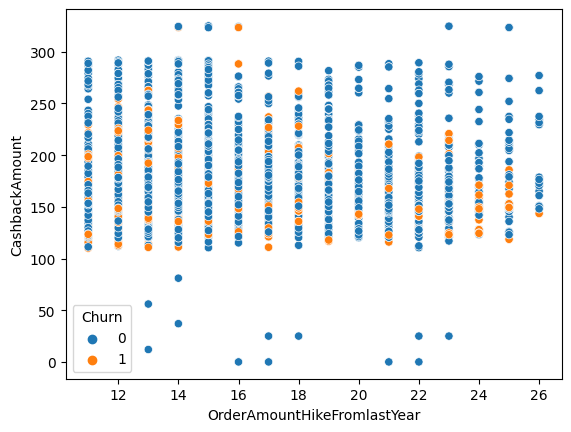

In [21]:
sns.scatterplot(x='OrderAmountHikeFromlastYear', y='CashbackAmount', hue='Churn', data=df)

# Save plot
plt.savefig('img/plotOLY.png')

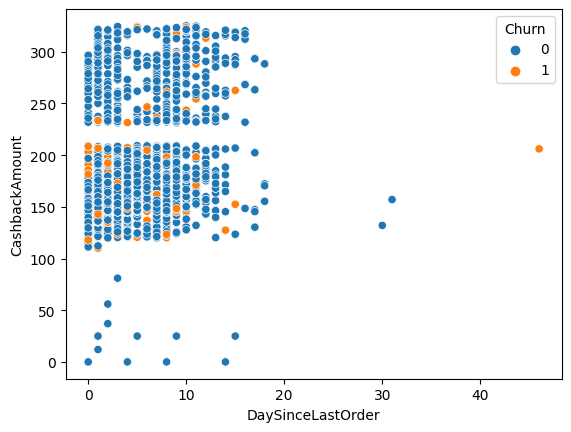

In [22]:
sns.scatterplot(x='DaySinceLastOrder', y='CashbackAmount', hue='Churn', data=df)

# Save plot
plt.savefig('img/plotLO.png')

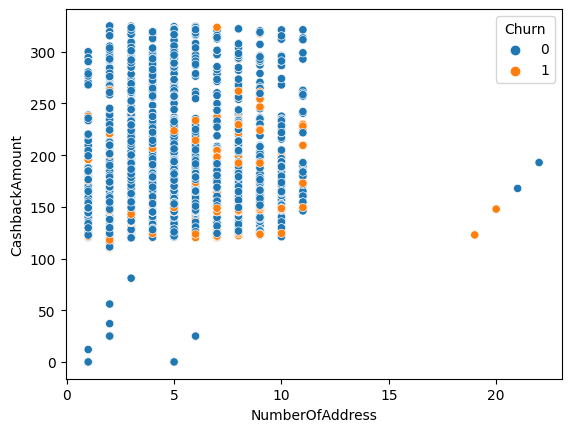

In [23]:
sns.scatterplot(x='NumberOfAddress', y='CashbackAmount', hue='Churn', data=df)

# Save plot
plt.savefig('img/plotAdd.png')

In [24]:
# check correlation categorical columns to target
# H0 (Fail to Reject Null) : Categorical columns does not have correlation with target (Churn)
# H1 (Reject Null): Categorical columns have correlation with target (Churn)

from scipy.stats import chi2_contingency
chi2_check = []
for i in cat_cols:
    if chi2_contingency(pd.crosstab(df['Churn'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,PreferredLoginDevice,Reject Null Hypothesis
1,PreferredPaymentMode,Reject Null Hypothesis
2,Gender,Reject Null Hypothesis
3,PreferedOrderCat,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis


All categorical columns can be included as a feature, because it Reject Null Hypothesis which mean the columns is correlated with the target column `Churn`.

## EDA Conclusion

# 2. Data Preprocessing

### Handle Missing Value

In [25]:
#count the number of missing values across each columns
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [26]:
#count the total number of missing values in the dataset
print(f'The number of missing values: {df.isnull().sum().sum()}')
#count the number of rows with missing values
print(f'The number of rows with missing values: {df[df.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856


In [27]:
#Check missing value percentage
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
dtype: float64

In total there are 1856 missing values, and there are also 1856 rows with missing values, meaning that each of the missing value is on a different row, and no row has more than one missing value. Each row which have missing values approximately around 4.4% to 5.4%.

So if we drop all the rows with missing values we would be dropping 1856 rows that is 32.97 percent of the dataset and will cause a data loss

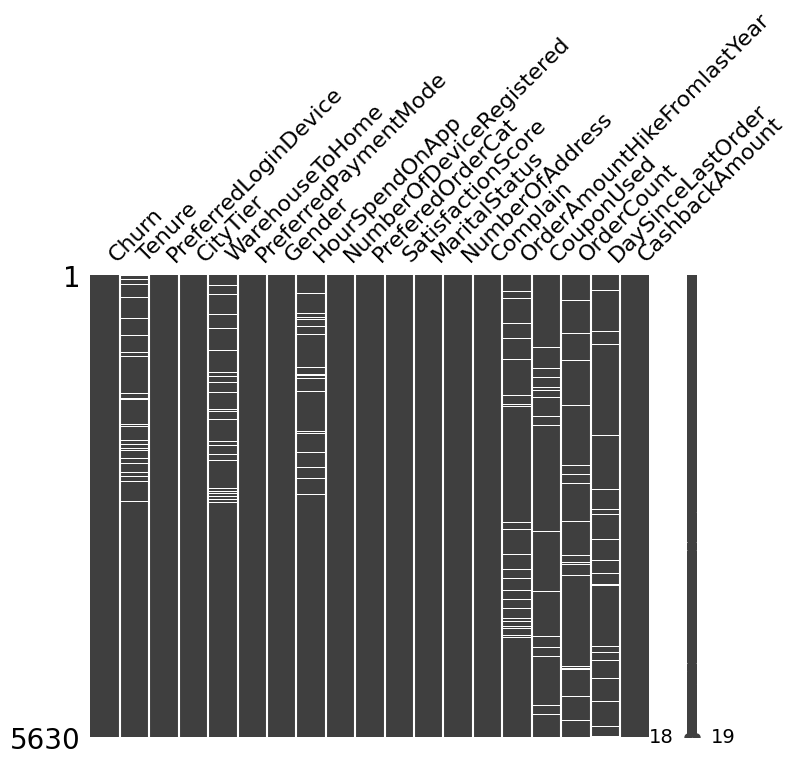

<Figure size 640x480 with 0 Axes>

In [28]:
#plot the missingness matrix
msno.matrix(df, figsize=(8,6))
plt.show()

# Save plot
plt.savefig('img/missing.png')

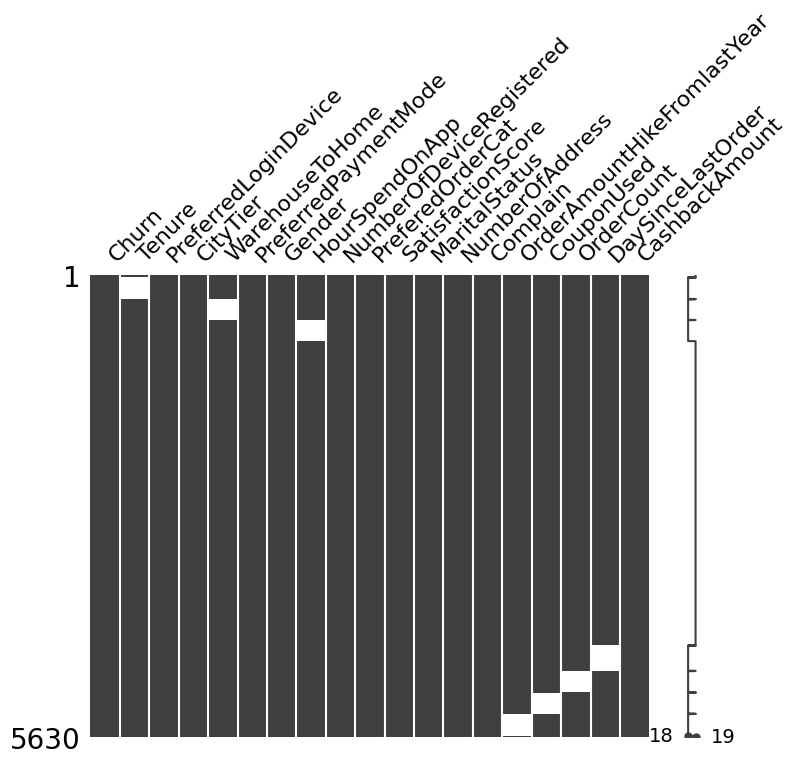

<Figure size 640x480 with 0 Axes>

In [29]:
#plot the missingness matrix of sorted data
msno.matrix(df.sort_values(by='CashbackAmount'), figsize=(8,6))
plt.show()

# Save plot
plt.savefig('img/missingsort.png')

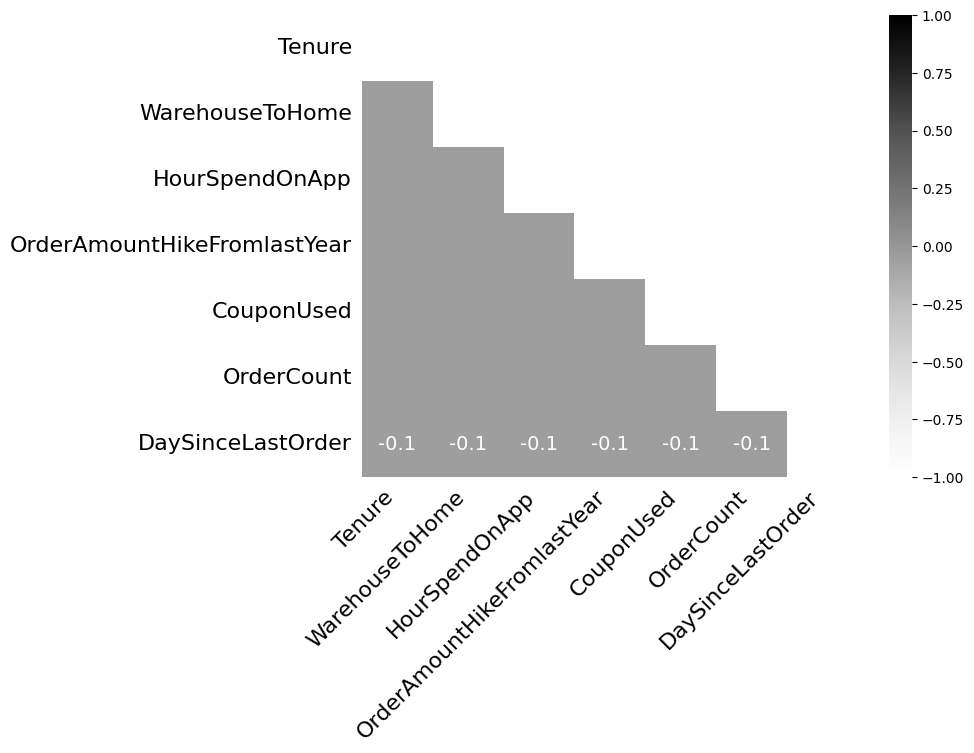

<Figure size 640x480 with 0 Axes>

In [30]:
#plot heatmap of missing values
msno.heatmap(df,figsize=(8,6), cmap="Greys")
plt.show()

# Save plot
plt.savefig('img/missingheat.png')

In [31]:
# fill null value with median
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)

In [32]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

## Label Encoding for Object Data Types

In [33]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


In [34]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: [1 2 0]
PreferredPaymentMode: [4 6 0 2 5 1 3]
Gender: [0 1]
PreferedOrderCat: [2 3 4 5 0 1]
MaritalStatus: [2 0 1]


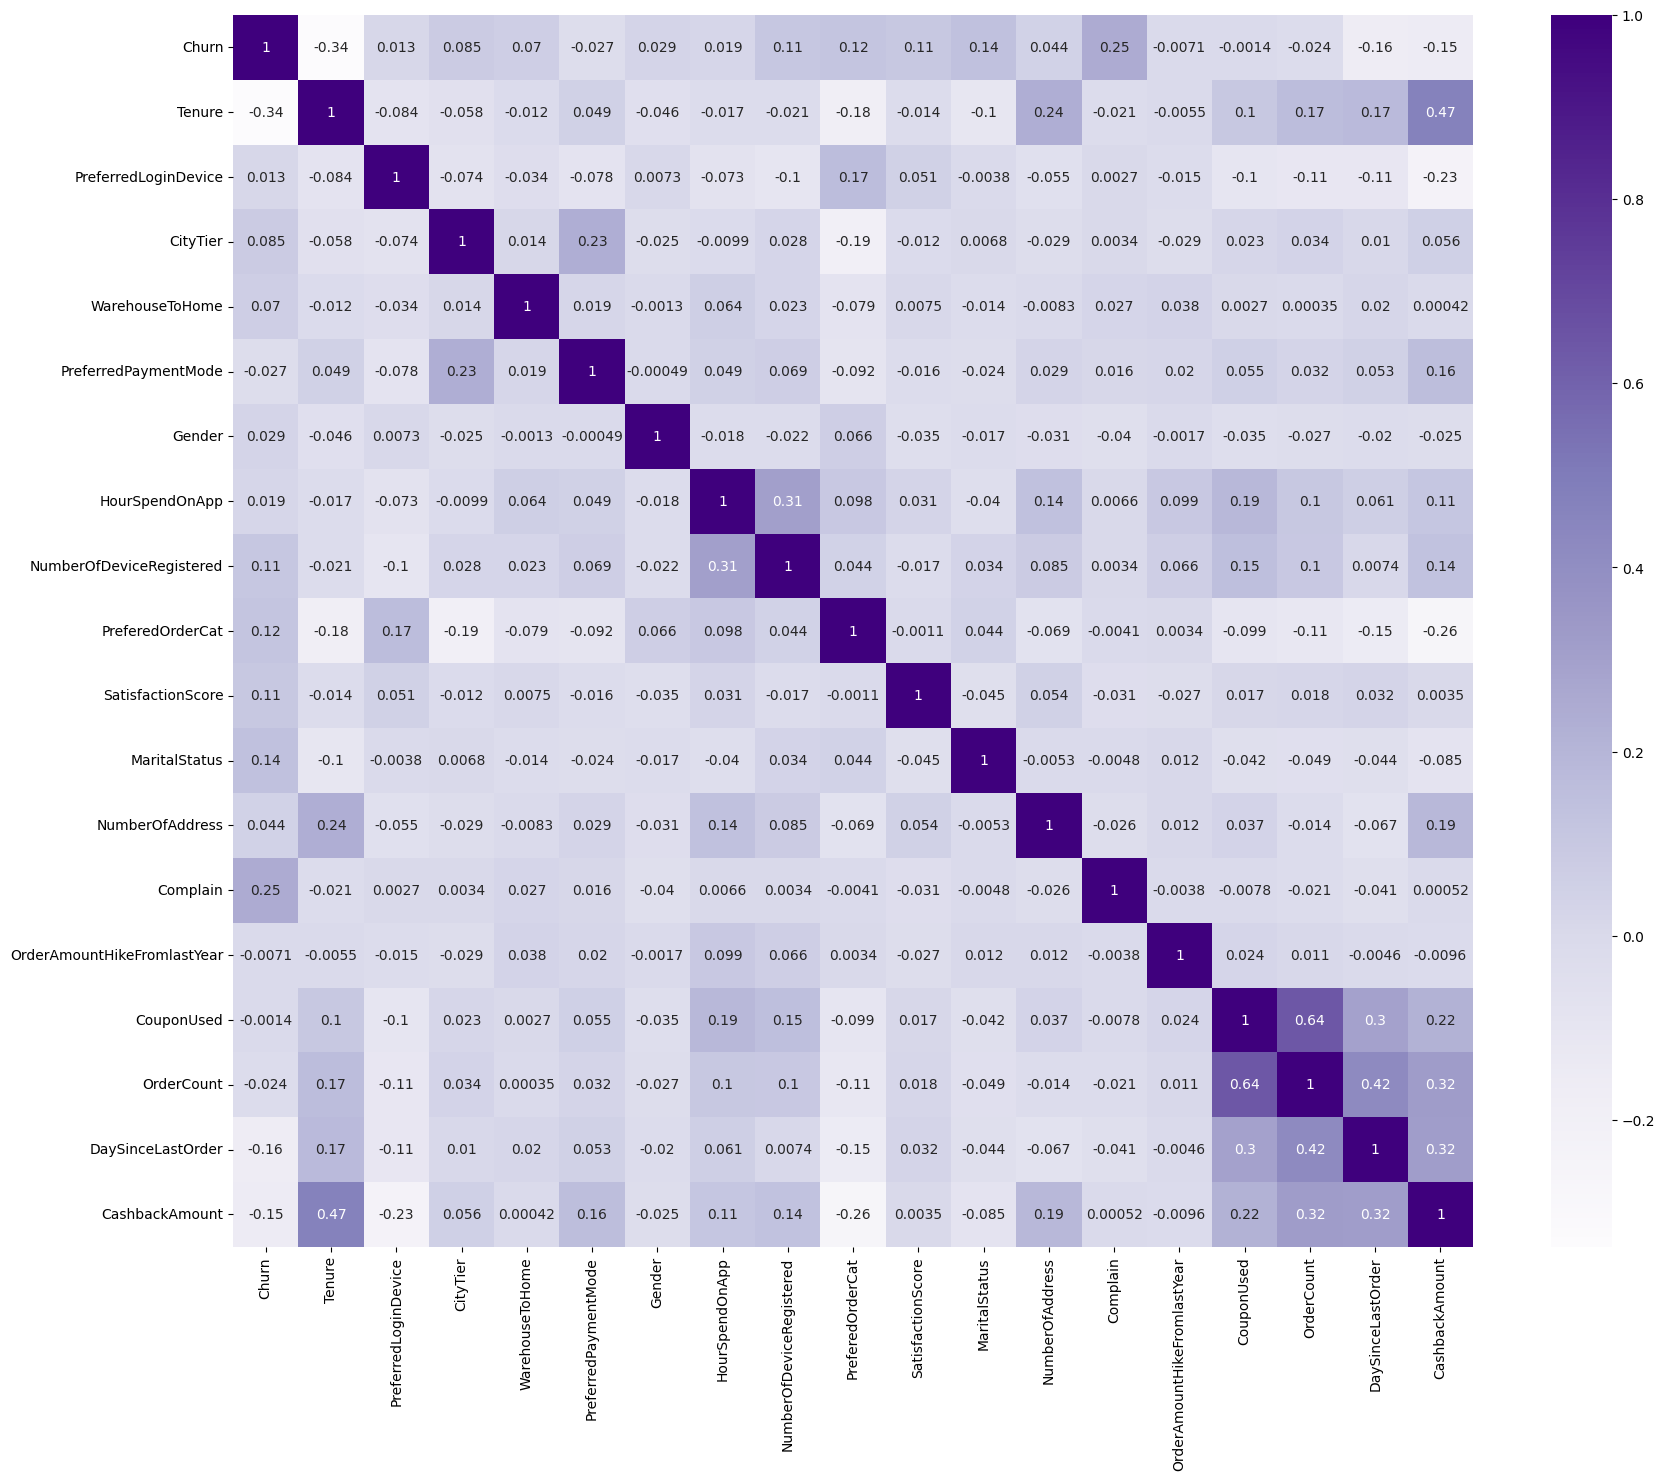

In [35]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True, cmap='Purples')

# Save plot
plt.savefig('img/heatmapcorr.png')

## Split Train and Test 

In [36]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [37]:
# Splitting into data train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f'Total data train consists of {len(X_train)} rows')
print(f'Count class 0 : {sum(y_train==0)}')
print(f'Count class 1 : {sum(y_train==1)}\n')

print(f'Total data test consist of {len(X_test)} rows')
print(f'Count class 0 : {sum(y_test==0)}')
print(f'Count class 1 : {sum(y_test==1)}\n')

Total data train consists of 4504 rows
Count class 0 : 3746
Count class 1 : 758

Total data test consist of 1126 rows
Count class 0 : 936
Count class 1 : 190



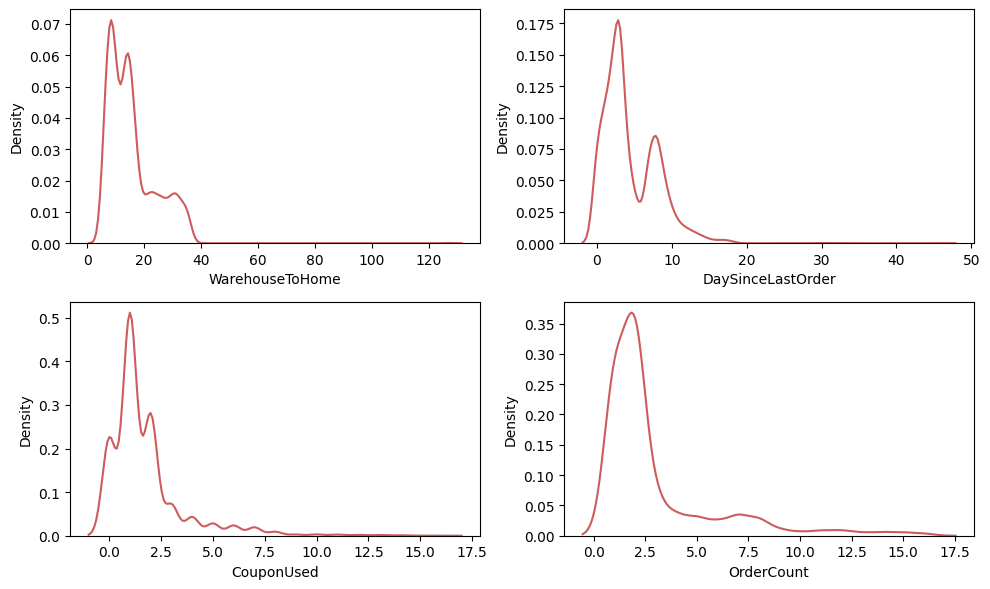

In [38]:
# Distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['WarehouseToHome', 'DaySinceLastOrder', 'CouponUsed', 'OrderCount']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

# Save plot
plt.savefig('img/distribution.png')

## Handle Outliers with Z-Score

In [39]:
from sklearn.model_selection import train_test_split

# Select the column for outlier removal
selected_column = ['WarehouseToHome', 'DaySinceLastOrder', 'CouponUsed', 'OrderCount']

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate the z-scores for the selected column in the training set
train_z_scores = np.abs((train_df[selected_column] - train_df[selected_column].mean()) / train_df[selected_column].std())

# Set the threshold for defining outliers (e.g., z-score > 3)
threshold = 3

# Filter the training DataFrame, removing rows with z-scores above the threshold in the selected column
train_df_no_outliers = train_df[train_z_scores <= threshold]

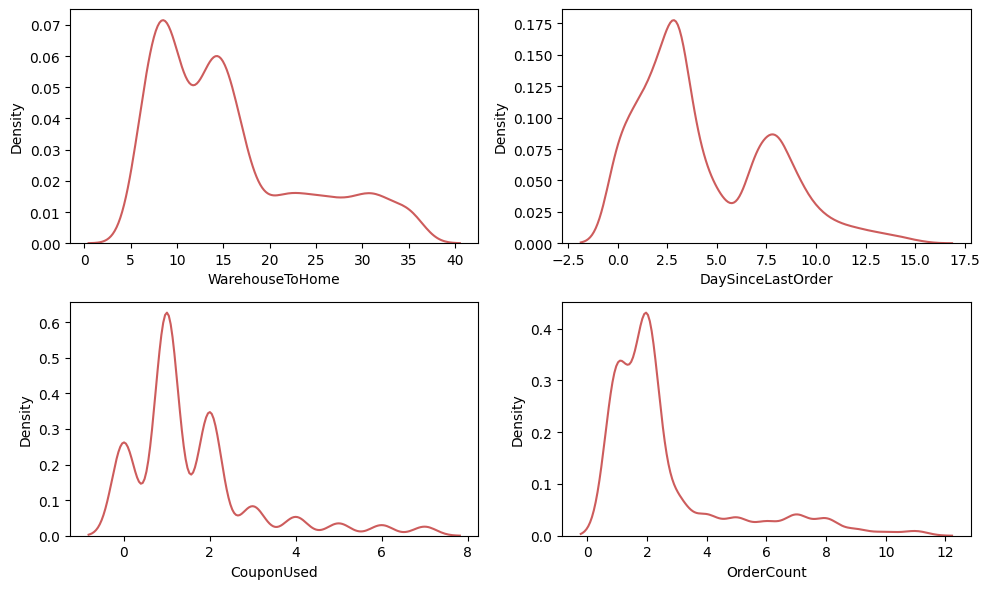

In [40]:
# Distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['WarehouseToHome', 'DaySinceLastOrder', 'CouponUsed', 'OrderCount']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=train_df_no_outliers[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

# Save plot
plt.savefig('img/scaled_distribution.png')

## Feature Selection

In [41]:
# Feature selection using Variance threshold
vars = VarianceThreshold(0.2)
vars.fit(X_train)
X_train_fs = pd.DataFrame(vars.transform(X_train),columns=vars.get_feature_names_out())
X_test_fs = pd.DataFrame(vars.transform(X_test),columns=vars.get_feature_names_out())

In [42]:
# Feature selection using fclassif for numerical feature
nume_cols = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

classif = SelectKBest(f_classif,k=4)
classif.fit(X_train_fs[nume_cols],y_train)
X_train_fnum = pd.DataFrame(classif.transform(X_train_fs[nume_cols]),columns=classif.get_feature_names_out())
X_test_fnum = pd.DataFrame(classif.transform(X_test_fs[nume_cols]),columns=classif.get_feature_names_out())

In [43]:
# Feature selection using chi2 for categorical feature
cate_cols =['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

chi2 = SelectKBest(chi2,k=5)
chi2.fit(X_train_fs[cate_cols],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cate_cols]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cate_cols]),columns=chi2.get_feature_names_out())

In [44]:
# Merging all feature selection result
all_coll = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[all_coll]
X_test = X_test[all_coll]

print(f'The selection result of features are: {all_coll}')

The selection result of features are: ['Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


# 3. Machine Learning Modelling

In [45]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
    
    print(f'Model {title} result:')
    print(f'- Count TP (True Positive) = {cm[1][1]}')
    print(f'- Count TN (True Negative) = {cm[0][0]}')
    print(f'- Count FP (False Positive) = {cm[0][1]}')
    print(f'- Count FN (False Negative) = {cm[1][0]}')

## 1. Logistic Regression

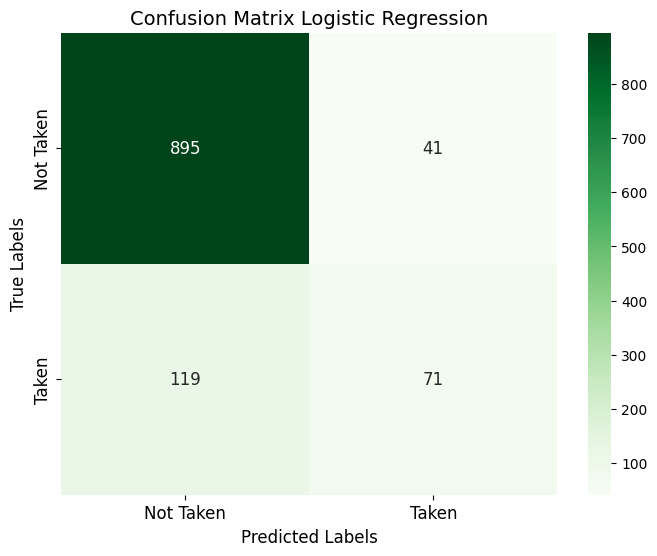

Model Logistic Regression result:
- Count TP (True Positive) = 71
- Count TN (True Negative) = 895
- Count FP (False Positive) = 41
- Count FN (False Negative) = 119


<Figure size 640x480 with 0 Axes>

In [46]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

# Save plot
plt.savefig('img/LR.png')

## 2. Decision Tree

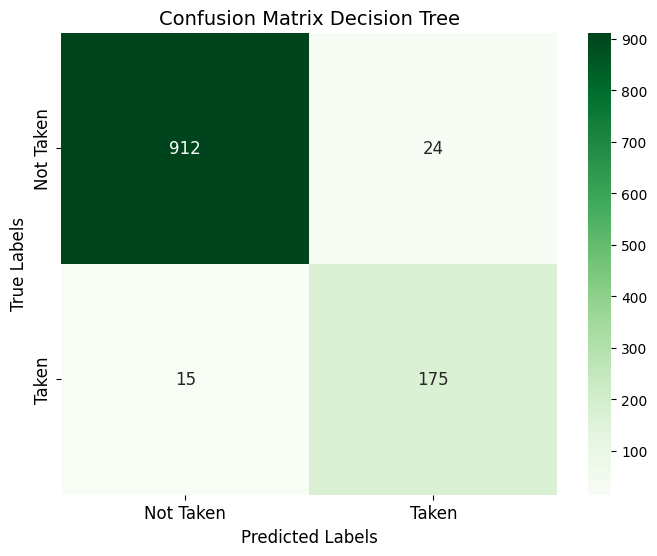

Model Decision Tree result:
- Count TP (True Positive) = 175
- Count TN (True Negative) = 912
- Count FP (False Positive) = 24
- Count FN (False Negative) = 15


<Figure size 640x480 with 0 Axes>

In [47]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

# Save plot
plt.savefig('img/DT.png')

## 3. Random Forest

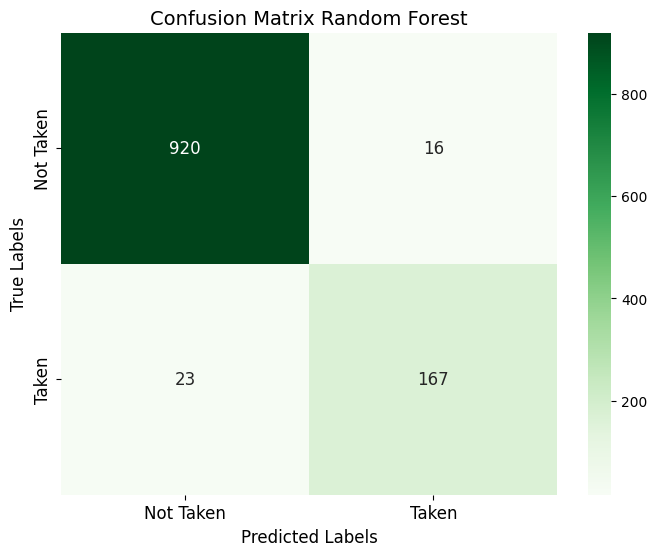

Model Random Forest result:
- Count TP (True Positive) = 167
- Count TN (True Negative) = 920
- Count FP (False Positive) = 16
- Count FN (False Negative) = 23


<Figure size 640x480 with 0 Axes>

In [48]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

# Save plot
plt.savefig('img/RF.png')

## 4. AdaBoost

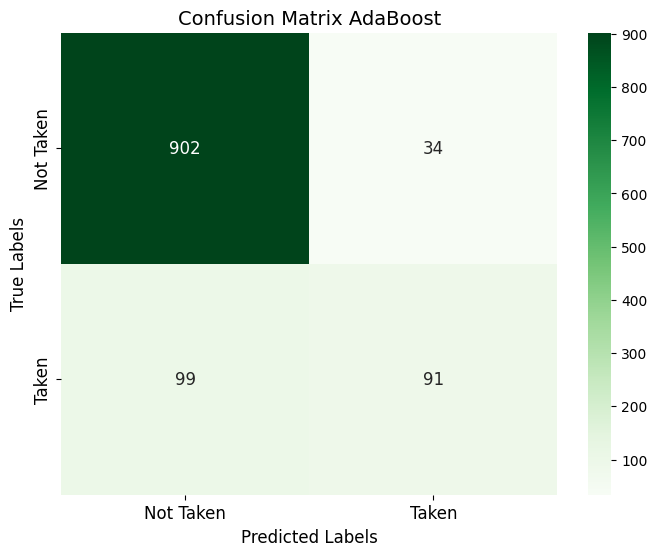

Model AdaBoost result:
- Count TP (True Positive) = 91
- Count TN (True Negative) = 902
- Count FP (False Positive) = 34
- Count FN (False Negative) = 99


<Figure size 640x480 with 0 Axes>

In [49]:
model_adb = AdaBoostClassifier(random_state=42)
model_adb.fit(X_train, y_train)

plotting_confusion_matrix(model_adb, X_test, y_test, title='AdaBoost')

# Save plot
plt.savefig('img/ADB.png')

## 5. XGBoost

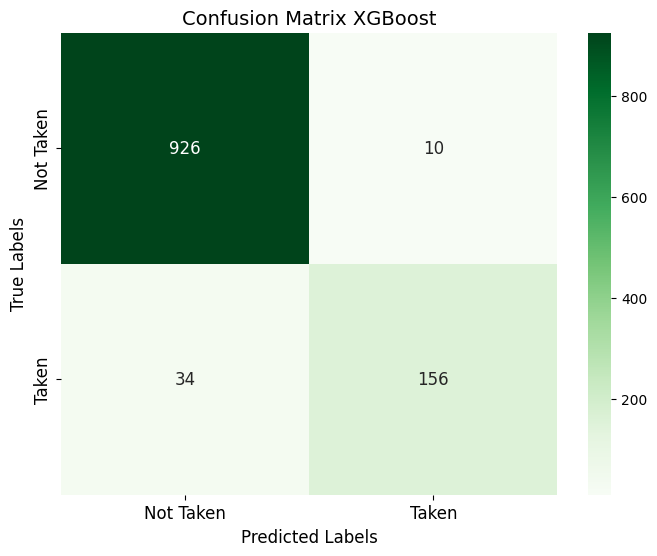

Model XGBoost result:
- Count TP (True Positive) = 156
- Count TN (True Negative) = 926
- Count FP (False Positive) = 10
- Count FN (False Negative) = 34


<Figure size 640x480 with 0 Axes>

In [50]:
model_xgb = XGBClassifier(verbosity=0, random_state=42)
model_xgb.fit(X_train, y_train)

plotting_confusion_matrix(model_xgb, X_test, y_test, title='XGBoost')

# Save plot
plt.savefig('img/XGB.png')

In [51]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)

    
    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [52]:
# Scoring base model
model_list_base = [model_lr, model_dt, model_rf, model_adb, model_xgb]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8579,0.6339,0.3737,0.4702,0.4128,0.8206,0.8417
1,Decision Tree,0.9654,0.8794,0.9211,0.8997,0.8792,0.9477,1.0000
2,Random Forest,0.9654,0.9126,0.8789,0.8954,0.8749,0.9929,1.0000
3,AdaBoost,0.8819,0.7280,0.4789,0.5778,0.5277,0.8871,0.9057
4,XGBoost,0.9609,0.9398,0.8211,0.8764,0.8561,0.9873,0.9997
